## Statystyka i Analiza danych
# Laboratorium 10 - Korelacja i regresja (część 2)

### Ćwiczenie 1: Regresja liniowa w R

Celem ćwiczenia jest zapoznanie się z funkcją `lm()` wykonującą regresję liniową w R.

Zacznijmy od wczytania poniższej funkcji generującej prostą ramkę danych:

In [1]:
generujDane <- function(n, a, b, sigma) {
  x <- runif(n)
  y <- a * x + b + sigma * rnorm(n)
  plot(y ~ x, t="p", xlab="X", ylab="Y", main="Regression Data")
  abline(b, a, lty="dashed")
  data.frame(X=x, Y=y)
}

Użyj powyższej funkcji aby wygenerować zbiór danych `Regresja` składający się z 50 obserwacji z prawdziwymi współczynnikami *a=3*, *b=-2* i szumem *sigma=1*.

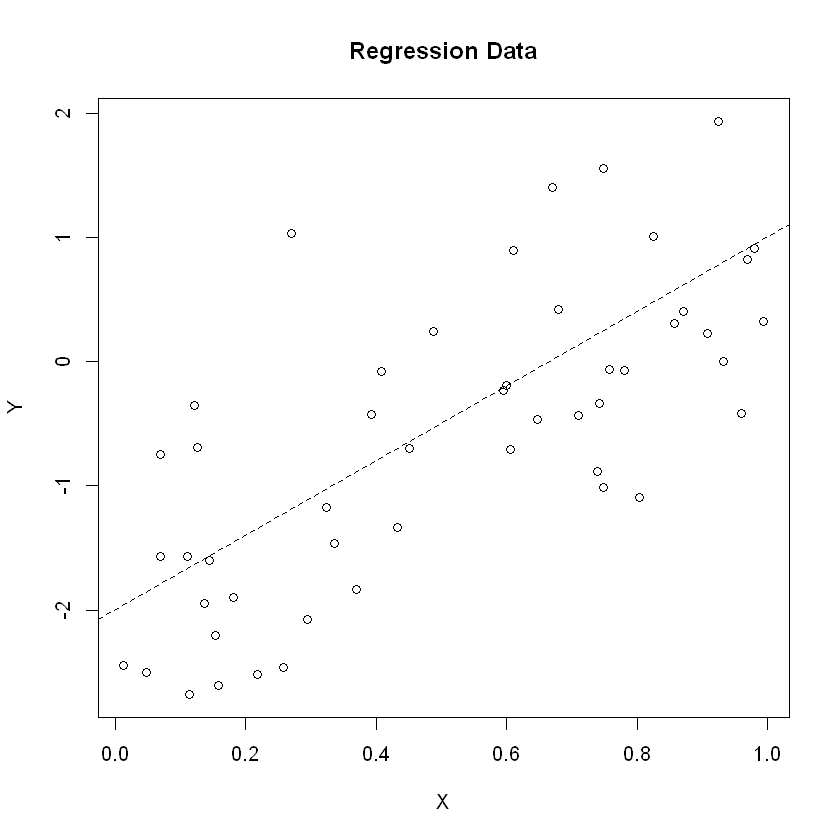

In [4]:
Regresja <- generujDane(50,3,-2,1)

Wyznacz współczynniki regresji liniowej, wyświetl zmienną `model` i porównaj współczynniki z prawdziwymi wartościami *a*, *b*.

In [5]:
model <- lm(Y ~ X, Regresja)
model


Call:
lm(formula = Y ~ X, data = Regresja)

Coefficients:
(Intercept)            X  
     -2.046        2.800  


Przypisz współczynniki do zmiennej `coeffs` i wyznacz wektor $\hat{Y}$ (ozn. `Yp`) wartości zmiennej objaśnianej wyznaczone z modelu liniowego.

In [8]:
coeffs <- model$coefficients

Yp <- coeffs[1] + coeffs[2]*Regresja$X

Wyznacz i wyświetl podsumowanie modelu. Zinterpretuj wypisywane wartości

In [9]:
modelSummary  <-  summary(model)
modelSummary


Call:
lm(formula = Y ~ X, data = Regresja)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2942 -0.5455 -0.1719  0.4616  2.3206 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.0462     0.2276  -8.992 7.29e-12 ***
X             2.7996     0.3831   7.307 2.49e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8375 on 48 degrees of freedom
Multiple R-squared:  0.5266,	Adjusted R-squared:  0.5168 
F-statistic:  53.4 on 1 and 48 DF,  p-value: 2.488e-09


Do poszczególnych elementów podsumowania można uzyskać dostęp poprzez funkcje:

- współczynniki modelu z błędami standardowymi, wartościami statystyki *t* i jej *p*-wartościami:

In [10]:
modelSummary$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-2.046235,0.2275661,-8.991825,7.290651e-12
X,2.799563,0.3831115,7.307436,2.487890e-09


- Współczynnik determinacji $R^2$:

In [11]:
modelSummary$r.squared

[1] 0.5266208

- Statystyka $F$:

In [12]:
F <- modelSummary$fstatistic
F

value    numdf    dendf 
53.39863  1.00000 48.00000

Sprawdź, czy model jest istotny statystycznie za pomocą statystyki *F* i porównaj z *p*-wartością zwracaną przez `modelSummary`:

In [18]:
1 - pf(F[1], F[2], F[3])

value 
2.48789e-09

Wyznacz również SST, SSE i SSR:

In [19]:
yMean <- mean(Regresja$Y)
SST <- sum((Regresja$Y - yMean)^2)
SSR <- sum((Yp - yMean)^2)
SSE <- sum((Regresja$Y - Yp)^2)
SST - SSR - SSE

[1] 2.842171e-14

Na koniec możesz wyświetlić wykresy diagnostyczne:

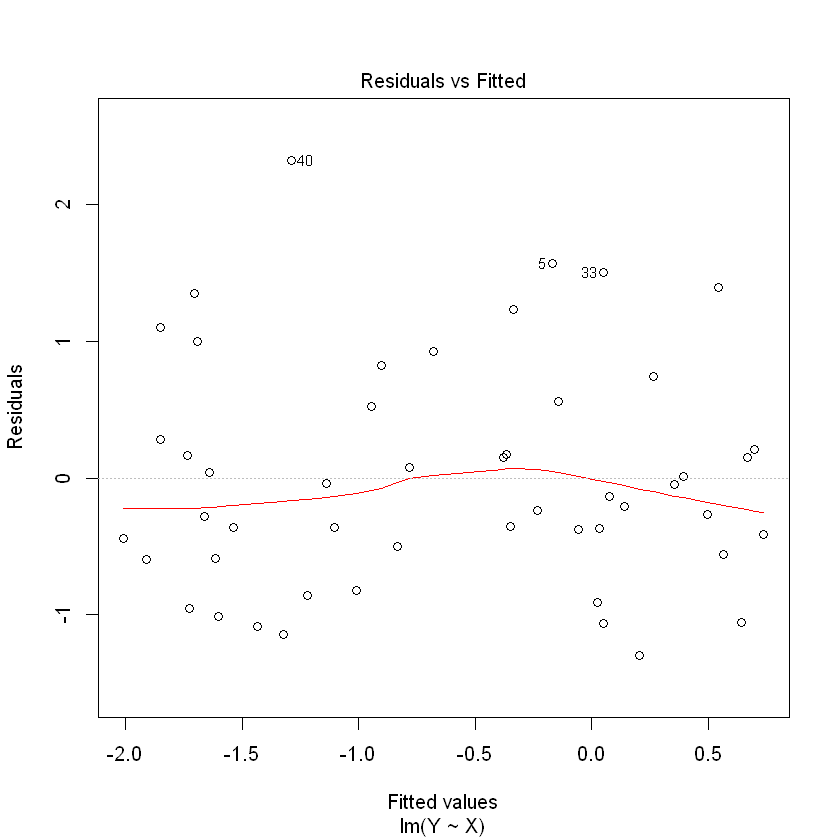

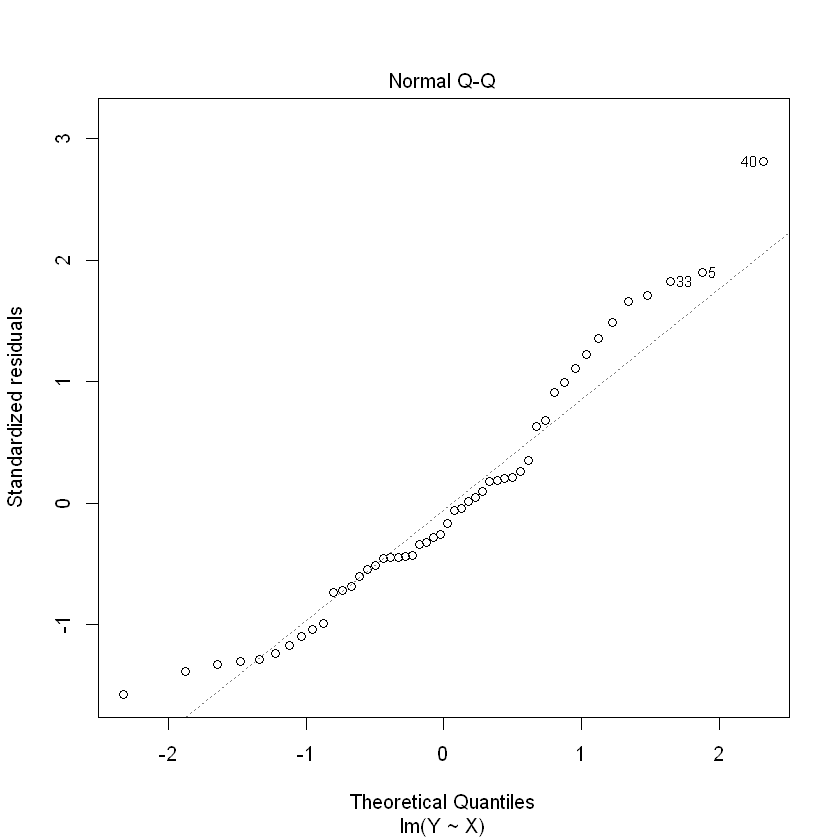

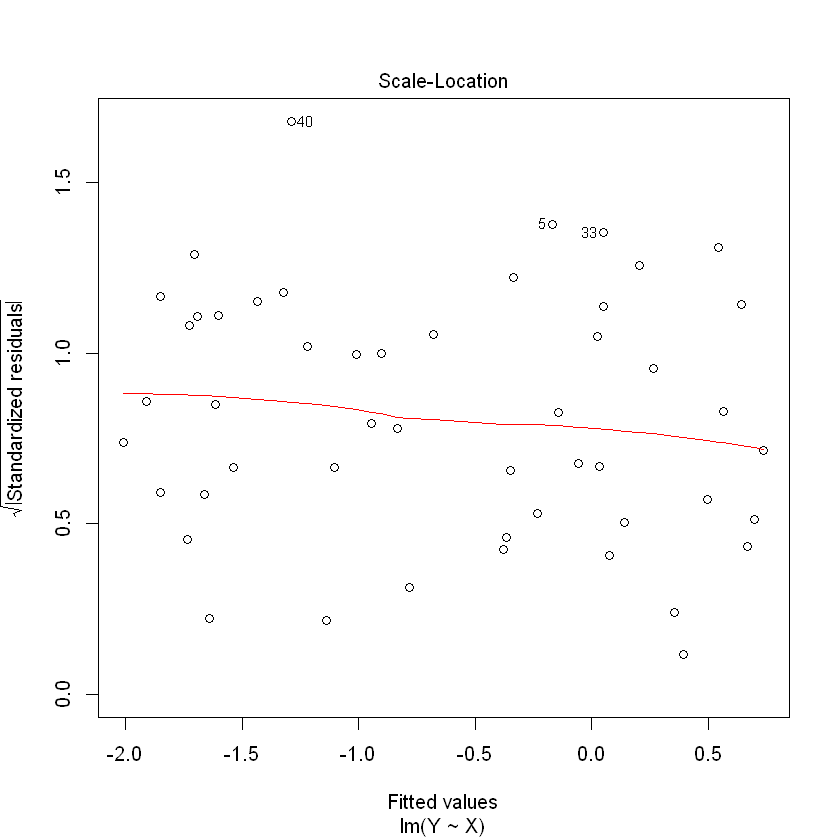

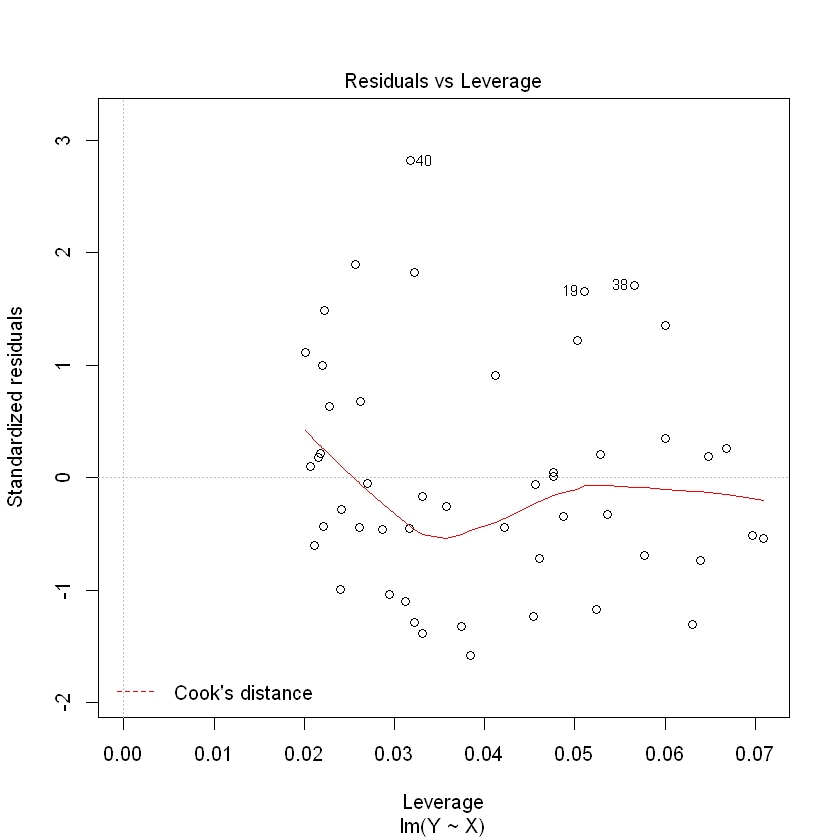

In [20]:
plot(model)

Czyszczenie przestrzeni roboczej (usunięcie wszystkich zmiennych, funkcji, itp.)

In [21]:
rm(list = ls())

### Ćwiczenie 2: Dane medyczne

Wysunięto hipotezę, że istnieje związek pomiędzy czasem działania pewnego leku u chorych na zaburzenia układu krążenia a aktywnością pewnego enzymu. Losowa próba dała następujące wyniki (patrz tabela). Dla zmiennych *x* i *y* należy:
 - wyliczyć współczynnik korelacji Pearsona
 - utworzyć wykres rozrzutu 
 - obliczyć funkcję regresji i dodaj do wykresu linię trendu
 - Czy odrzucenie danych o pewnych obserwacjach mogłoby poprawić wyniki?
 - Czy jeszcze jakaś transformacja zbioru danych pozwoliłaby na dalsze polepszenie wyników ?

Zaczynamy od załadowania danych wykonując poniższy kod:

In [22]:
Dane <- read.csv(url("http://www.cs.put.poznan.pl/swilk/siad/10-cw2.csv"), sep=";")

Dane te zawierają informację o płci, czasie działania leku (`x`) i aktywności enzymu (`y`). Wyświetl tabelę z danymi:

In [26]:
Dane

plec,x,y
k,15.6,44.5
k,10.6,44.0
k,16.9,25.8
k,15.0,39.3
k,6.7,21.8
k,12.0,37.3
k,16.0,43.5
k,13.0,21.3
k,9.7,32.8
k,7.8,43.0


Wyznacz współczynnik korelacji Pearsona:

In [28]:
wspKor <- cor(Dane$x, Dane$y)
wspKor

[1] -0.3022527

Korzystajac z funkcji `plot` utwórz wykres rozrzutu dla tych danych. Opisz odpowiednio osie wykresu. Wyznacz funkcję regresji i dodaj ją do wykresu:

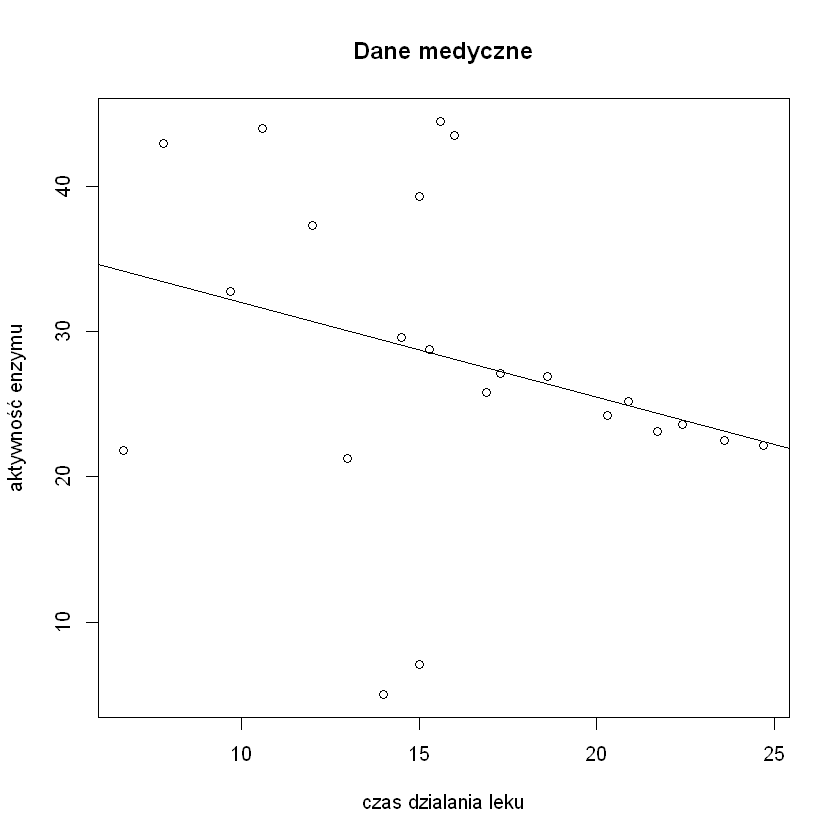

In [29]:
plot( Dane$x, Dane$y, main="Dane medyczne", xlab="czas dzialania leku", ylab="aktywność enzymu")
model <- lm(y~x,Dane)
abline(model)

Sprawdź, czy wynik jest istotny na poziomie istotności *alfa=0.05* za pomocą funkcji `summary` lub ręcznie wyznaczając *p*-wartość statystyki *F*:

In [39]:
podsumowanie_modelu <- summary(model)
test_F <- podsumowanie_modelu$fstatistic
P_wartosc <- 1 - pf(test_F[1],test_F[2], test_F[3])
P_wartosc
#wynik nie jest istotny statystycznie (p-value > alfa)

value 
0.1715727

Czy odrzucenie części danych mogłoby poprawić wyniki?

value 
0.7454924

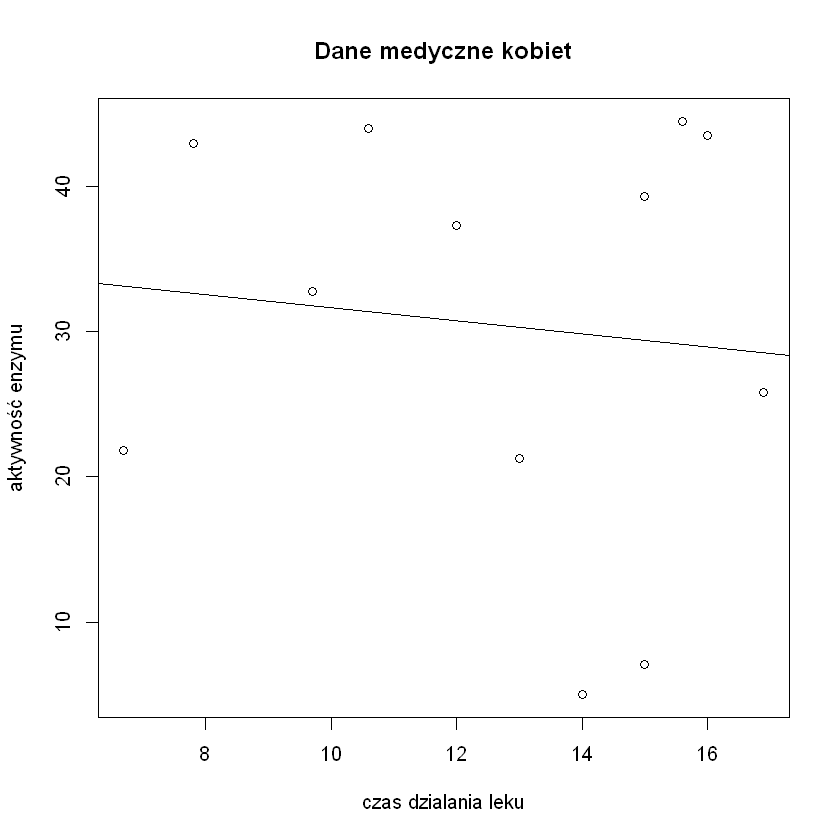

In [41]:
DaneK <- Dane[Dane$plec == "k",]

plot( DaneK$x, DaneK$y, main="Dane medyczne kobiet", xlab="czas dzialania leku", ylab="aktywność enzymu")
modelK <- lm(y~x,DaneK)
abline(modelK)
podsumowanie_modeluK <-summary(modelK)
test_FK <- podsumowanie_modeluK$fstatistic
P_wartoscK <- 1 - pf(test_FK[1],test_FK[2], test_FK[3])
P_wartoscK
#wynik nie jest istotny statystycznie (p-value >> alfa)

value 
7.192265e-07

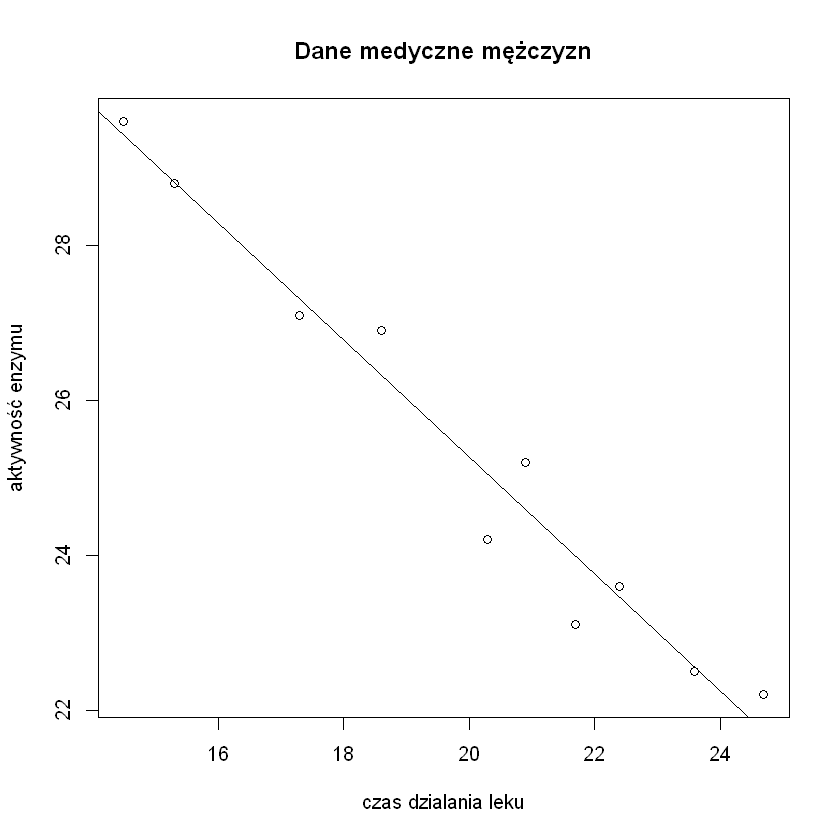

In [43]:
DaneM <- Dane[Dane$plec == "m",]

plot( DaneM$x, DaneM$y, main="Dane medyczne mężczyzn", xlab="czas dzialania leku", ylab="aktywność enzymu")
modelM <- lm(y~x,DaneM)
abline(modelM)
podsumowanie_modeluM <-summary(modelM)
test_FM <- podsumowanie_modeluM$fstatistic
P_wartoscM <- 1 - pf(test_FM[1],test_FM[2], test_FM[3])
P_wartoscM
#wynik jest istotny statystycznie (p-value < alfa)

Czyścimy przestrzeń roboczą:

In [44]:
rm(list = ls())

### Ćwiczenie 3: Szacowanie czasu pracy programistów

Baza danych historycznych obejmuje oszacowane przez programistów czasy pracy oraz faktyczny rozmiar programu. Sprawdź, czy te dwie zmienne są zależne i przeprowadź analizę regresji. Powyższe zadanie ilustruje jeden z elementów metody PSP.

Wczytaj i wyświetl dane z pliku:
 

In [45]:
Programy <- read.csv(url("http://www.cs.put.poznan.pl/swilk/siad/10-cw3.csv"), sep=";")
Programy

rozmiar,czas
186,130
699,650
132,99
272,150
291,128
331,302
199,95
1890,945
788,368
1601,961


Teraz dołączymy `Programy` do ścieżki przeszukiwania nazw zmiennych. Dzięki temu możemy odwoływać się do zmiennych w `Programy` bez konieczności każdorazowego zaznaczania ramki danych

In [46]:
attach(Programy)

Np. wyznaczenie współczynnika korelacji Pearsona wygląda teraz tak:

In [47]:
wspKor <- cor(rozmiar, czas)

Utwórz wykres rozrzutu (czas w funkcji rozmiaru), oblicz funkcję regresji i dodaj ją do wykresu:

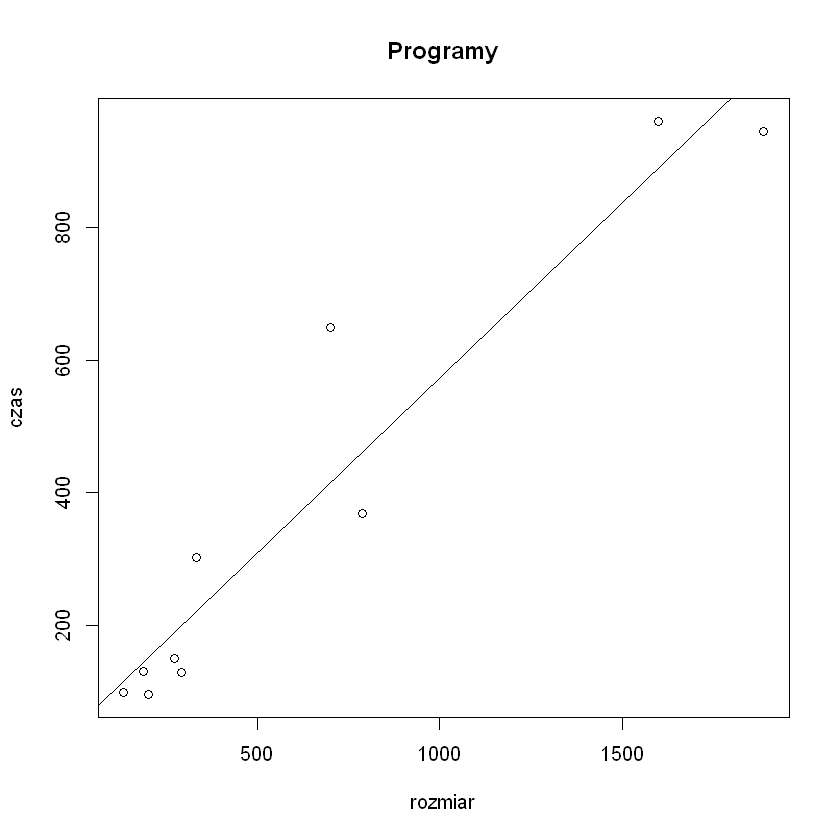

In [48]:
plot(rozmiar, czas, main="Programy", xlab="rozmiar", ylab="czas")
model <- lm(czas~rozmiar)
abline(model)

Sprawdź, czy wynik jest istotny na poziomie istotności *alfa=0.05* za pomocą funkcji `summary`

In [49]:
podsumowanie_modelu <-summary(model)
test_F <- podsumowanie_modelu$fstatistic
P_wartosc <- 1 - pf(test_F[1],test_F[2], test_F[3])
P_wartosc
# wynik jest istotny statystycznie (p-value < alfa)

value 
1.775172e-05

Zinterpretuj współczynniki modelu

In [50]:
model


Call:
lm(formula = czas ~ rozmiar)

Coefficients:
(Intercept)      rozmiar  
    45.9358       0.5273  


Odłącz ramkę danych od ścieżki i wyczyść przestrzeń roboczą:

In [51]:
detach(Programy)
rm(list = ls())

### Ćwiczenie 4: Analiza regresji wielu zmiennych (wieloraka)

Zadanie demonstracyjne, które pokaże przykład analizy regresji wielu zmiennych i różnicę między testem *t* na istotoność zmiennych w modelu, a globalnym testem *F*.

Wczytaj dane z pliku 10-cw4.csv i wyświetl tabelę danych. Jest to zbiór danych ekonomicznych, gdzie `Exports` jest zmienną objaśnianą (*Y*), a pozostałe są zmiennymi objaśniającymi (*X*)

In [52]:
Ekonom <- read.csv(url("http://www.cs.put.poznan.pl/swilk/siad/10-cw4.csv"), sep=";")
Ekonom

Exports,M1,Lend,Price,Exchange
2.6,5.1,7.8,114,2.2
2.6,4.9,8.0,116,2.2
2.7,5.1,8.1,117,2.2
3.0,5.1,8.1,122,2.2
2.9,5.1,8.1,124,2.2
3.1,5.2,8.1,128,2.2
3.2,5.1,8.3,132,2.1
3.7,5.2,8.8,133,2.2
3.6,5.3,8.9,133,2.2
3.4,5.4,9.1,134,2.2


Utwórz model liniowy zmiennej `Exports` w funkcji pozostałych zmiennych:

In [53]:
model <- lm(Exports ~ ., Ekonom) # skrócony zapis dla lm(Exports ~ M1 + Lend + Price + Exchange, Ekonom)
model


Call:
lm(formula = Exports ~ ., data = Ekonom)

Coefficients:
(Intercept)           M1         Lend        Price     Exchange  
  -4.047103     0.368372     0.002669     0.036862     0.268003  


Wyświetl podsumowanie modelu:

In [54]:
summary(model)


Call:
lm(formula = Exports ~ ., data = Ekonom)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.92502 -0.12779 -0.03198  0.18502  0.91181 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.047103   2.329192  -1.738   0.0873 .  
M1           0.368372   0.062276   5.915 1.55e-07 ***
Lend         0.002669   0.047919   0.056   0.9558    
Price        0.036862   0.009324   3.954   0.0002 ***
Exchange     0.268003   0.928517   0.289   0.7738    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3357 on 62 degrees of freedom
Multiple R-squared:  0.8251,	Adjusted R-squared:  0.8138 
F-statistic:  73.1 on 4 and 62 DF,  p-value: < 2.2e-16


O ile sam model jest istotny statystycznie na poziomie *alfa=0.05* (*p*-wartość statystyki *F < 2.2e-16*), o tyle niektóre ze zmiennych nie są istotne statystycznie (*p*-wartość statystyki *t < 0.05*). Poniższa analiza może nam posłużyć do selekcji zmiennych istotnych statystycznie.

Odrzucamy więc zmienne nieistotne statystycznie i pozostawiamy tylko `Exports`, `M1` i `Price`

In [57]:
Ekonomia <-Ekonom[,c("Exports", "M1", "Price")]
#Ekonomia

Ponownie wykonujemy analizę regresji:

In [58]:
model2 <-lm(Exports ~.,Ekonomia)
model2
summary(model2)


Call:
lm(formula = Exports ~ ., data = Ekonomia)

Coefficients:
(Intercept)           M1        Price  
   -3.42296      0.36142      0.03703  



Call:
lm(formula = Exports ~ ., data = Ekonomia)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.93106 -0.12490 -0.02465  0.18140  0.90508 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.422957   0.540853  -6.329 2.75e-08 ***
M1           0.361417   0.039246   9.209 2.45e-13 ***
Price        0.037033   0.004094   9.046 4.70e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3306 on 64 degrees of freedom
Multiple R-squared:  0.8248,	Adjusted R-squared:  0.8193 
F-statistic: 150.7 on 2 and 64 DF,  p-value: < 2.2e-16
